In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

In [2]:
red_wine = pd.read_csv('C:/Users/Kyungae_Yoon/Desktop/Kaggle/Exercise/Dataset/red-wine.csv')

In [3]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

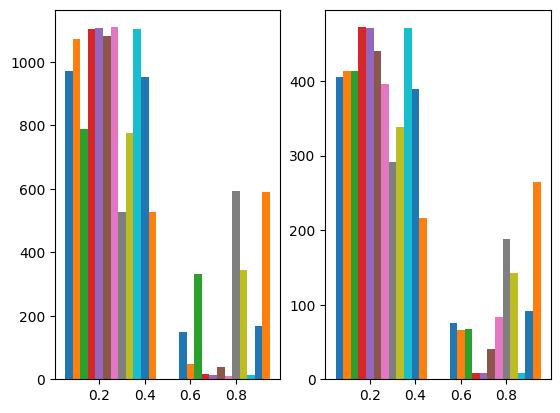

In [4]:
train_max_ = df_train.max(axis=0)
train_min_ = df_train.min(axis=0)

valid_max_ = df_valid.max(axis=0)
valid_min_ = df_valid.min(axis=0)

df_train_scale = (df_train - train_min_) / (train_max_ - train_min_)
df_valid_scale = (df_valid - valid_min_) / (valid_max_ - valid_min_)

plt.subplot(1,2,1)
plt.hist(df_train_scale, bins=2)
plt.subplot(1,2,2)
plt.hist(df_valid_scale, bins=2)
plt.show()

In [5]:
X_train = df_train_scale.drop('quality', axis=1)
X_valid = df_valid_scale.drop('quality', axis=1)
y_train = df_train_scale['quality']
y_valid = df_valid_scale['quality']

In [6]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692


In [7]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae')

Epoch 1/500
3/3 [==============================] - 1s 184ms/step - loss: 0.3890 - val_loss: 0.2598
Epoch 2/500
3/3 [==============================] - 0s 42ms/step - loss: 0.2168 - val_loss: 0.1456
Epoch 3/500
3/3 [==============================] - 0s 38ms/step - loss: 0.1482 - val_loss: 0.1498
Epoch 4/500
3/3 [==============================] - 0s 39ms/step - loss: 0.1337 - val_loss: 0.1350
Epoch 5/500
3/3 [==============================] - 0s 38ms/step - loss: 0.1327 - val_loss: 0.1268
Epoch 6/500
3/3 [==============================] - 0s 43ms/step - loss: 0.1194 - val_loss: 0.1208
Epoch 7/500
3/3 [==============================] - 0s 40ms/step - loss: 0.1182 - val_loss: 0.1100
Epoch 8/500
3/3 [==============================] - 0s 38ms/step - loss: 0.1106 - val_loss: 0.1081
Epoch 9/500
3/3 [==============================] - 0s 39ms/step - loss: 0.1112 - val_loss: 0.1081
Epoch 10/500
3/3 [==============================] - 0s 40ms/step - loss: 0.1087 - val_loss: 0.1041
Epoch 11/500
3/3 [

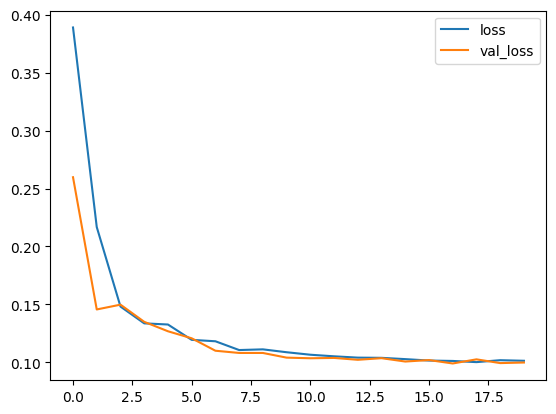

In [8]:
history = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            batch_size=512,
            epochs=500,
            callbacks=[early_stopping],
            verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print('Minimun validation loss: {}'.format(history_df['val_loss'].min()))

In [9]:
history